# Project 1

## warm up

### Task 1.1


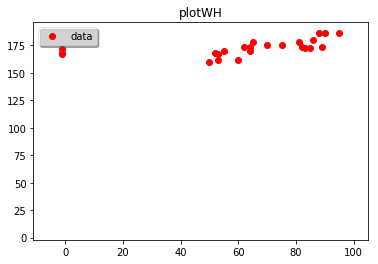

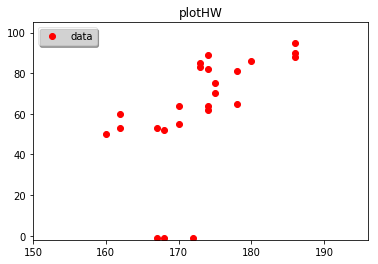

In [4]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


def plotData2D(X, title):
    # create a figure and its axes
    fig = plt.figure()
    axs = fig.add_subplot(111)

    # see what happens, if you uncomment the next line
    # axs.set_aspect('equal')
    
    # plot the data 
    axs.plot(X[0,:], X[1,:], 'ro', label='data')

    # set x and y limits of the plotting area
    xmin = X[0,:].min()
    xmax = X[0,:].max()
    axs.set_xlim(xmin-10, xmax+10)
    axs.set_ylim(-2, X[1,:].max()+10)

    # set properties of the legend of the plot
    leg = axs.legend(loc='upper left', shadow=True, fancybox=True, numpoints=1)
    leg.get_frame().set_alpha(0.5)

    plt.title(title)
    plt.show()
    # either show figure on screen or write it to disk
    #if filename == None:
    #    plt.title(title)
    #    plt.show()
    #else:
    #    plt.savefig(filename, facecolor='w', edgecolor='w',
    #                papertype=None, format='pdf', transparent=False,
    #                bbox_inches='tight', pad_inches=0.1)
    



#######################################################################
# 1st alternative for reading multi-typed data from a text file
#######################################################################
# define type of data to be read and read data from file
dt = np.dtype([('w', np.float), ('h', np.float), ('g', np.str_, 1)])
data = np.loadtxt('whData.dat', dtype=dt, comments='#', delimiter=None)

# read height, weight and gender information into 1D arrays
ws = np.array([d[0] for d in data])
hs = np.array([d[1] for d in data])
gs = np.array([d[2] for d in data]) 


##########################################################################
# 2nd alternative for reading multi-typed data from a text file
##########################################################################
# read data as 2D array of data type 'object'
data = np.loadtxt('whData.dat',dtype=np.object,comments='#',delimiter=None)

# read height and weight data into 2D array (i.e. into a matrix)
X = data[:,0:2].astype(np.float)

# read gender data into 1D array (i.e. into a vector)
y = data[:,2]

# let's transpose the data matrix 
X = X.T

# now, plot weight vs. height using the function defined above
plotData2D(X, 'plotWH')

# next, let's plot height vs. weight 
# first, copy information rows of X into 1D arrays
w = np.copy(X[0,:])
h = np.copy(X[1,:])

# second, create new data matrix Z by stacking h and w
Z = np.vstack((h,w))

# third, plot this new representation of the data
plotData2D(Z, 'plotHW')


### Task 1.1

Plot the data without the outliers (Plot only positive weight entries)

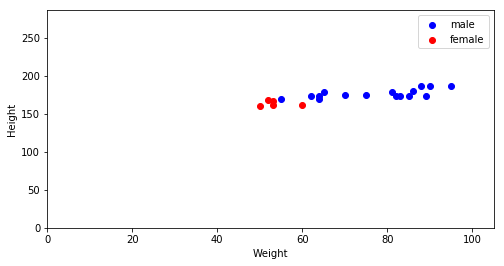

In [5]:
data = np.loadtxt('whData.dat',
                  dtype=np.object,
                  comments='#',
                  delimiter=None)

W = data[:,0].astype('float32')
H = data[:,1].astype('float32')
G = data[:,2]

w_mask = ((W > 0) * 1).nonzero()

W = W[w_mask]
H = H[w_mask]
G = G[w_mask]

male_mask = ((G == 'm') * 1).nonzero()
W_m = W[male_mask]
H_m = H[male_mask]

female_mask = ((G == 'f') * 1).nonzero()
W_f = W[female_mask]
H_f = H[female_mask]

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.set_ylim([0, np.max(H)+100])
ax.set_xlim([0, np.max(W)+10])
ax.set_ylabel('Height')
ax.set_xlabel('Weight')
ax.scatter(W_m, H_m, color='blue', label='male')
ax.scatter(W_f, H_f, color='red', label='female')
plt.legend()
plt.show()

### task 1.2: fitting a Normal distribution to 1D data

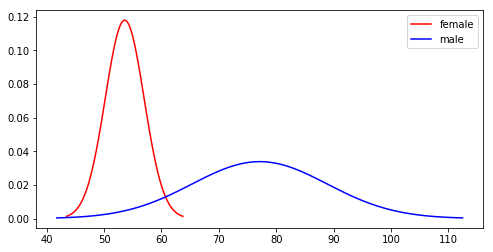

In [6]:
import matplotlib.mlab as mlab

mu_f = np.mean(W_f)
std_f = np.std(W_f)
mu_m = np.mean(W_m)
std_m = np.std(W_m)

def plot_gaussian(ax, mu, sigma, color, label):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax.plot(x,mlab.normpdf(x, mu, sigma), color=color, label=label)


fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

plot_gaussian(ax, mu_f, std_f, color='red', label='female')
plot_gaussian(ax, mu_m, std_m, color='blue', label='male')
plt.legend()
plt.show()

### task 1.3 fitting a Weibull distribution to 1D data

**PDF** of Weibull distribution: $$
f(x \ \big\vert \ \kappa, \alpha) = \frac{\kappa}{\alpha} \big(
\frac{x}{\alpha}
\big)^{\kappa - 1} exp\biggr[ - \big(
\frac{x}{\alpha}
\big)^{\kappa} \biggr]
$$

with $\alpha, \kappa$ being shape and scale parameter

**Log-likelihood** given a data sample $D=\{ d_i\}_{i=1}^N$:
$$
L(\alpha, \kappa \ \big\vert \ D) = N(\log \kappa - \kappa \log \alpha)
+ (\kappa -1) \sum_i \log d_i - \sum_i \big(\frac{d_i}{\alpha}\big)^{\kappa}
$$

Deriving $L$ w.r.t. $\alpha, \kappa$ leads to a coupled system of partial differential equations for which there is no closed form solution. Therefore, resort to Newton's method for simultaneous equations and compute:
$$
\begin{bmatrix}
\kappa^{new}\\ 
\alpha^{new}
\end{bmatrix} = \begin{bmatrix}
\kappa\\ 
\alpha
\end{bmatrix} + 
\begin{bmatrix}
\frac{\partial^2L}{\partial\kappa^2} & \frac{\partial^2L}{\partial\kappa \partial \alpha} \\ 
\frac{\partial^2L}{\partial\kappa \partial \alpha} & 
\frac{\partial^2L}{\partial\alpha^2} 
\end{bmatrix}^{-1}
\begin{bmatrix}
-\frac{\partial L}{\partial\kappa} \\ 
-\frac{\partial L}{\partial\alpha}
\end{bmatrix}
$$

4.89665648591 0.912724361929


/Users/vyas/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in power
  


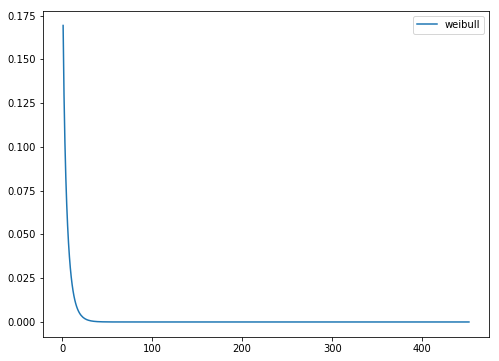

In [7]:
from numpy import genfromtxt
data = genfromtxt('myspace.csv', delimiter=',', dtype=np.object)
h = data[:,1].astype('float32')
mask = ((h > 0) * 1).nonzero()
h = h[mask]

n = h.shape[0]
x = np.array(range(0, n))


def f(x, k, a):
    """ weibull pdf
    """
    return (k/a) * ((x/a)**(k-1)) * np.exp(-(x/a)**k)

def dLdk(a, k, D):
    N = D.shape[0]
    return N * (np.log(k) - k * np.log(a)) + \
        (k-1) * np.sum(np.log(D)) - np.sum((D/a)**a)

def dLda(a, k, D):
    N = D.shape[0]
    return (k/a) * (np.sum((D/a)**k - N))

def d2Ldk2(a, k, D):
    N = D.shape[0]
    return -(N/k**2) - np.sum((D/a)**k * np.log(D/a)**2)

def d2Lda2(a, k, D):
    N = D.shape[0]
    return (k/(a**2)) * (k + 1) * np.sum((D/a)**k)

def d2Ldkda(a, k, D):
    N = D.shape[0]
    return (1/a) * np.sum((D/a)**k) + (k/a) * \
        np.sum((D/a)**k * np.log(D/a) - N/a)

    
def step(a, k, D):
    v = np.array([k, a])
    u = np.array([-dLdk(a, k, D), -dLda(a, k, D)])
    d2Ldkda_ = d2Ldkda(a,k,D)
    J = np.linalg.inv(np.array([
        [d2Ldk2(a,k,D), d2Ldkda_],
        [d2Ldkda_, d2Lda2(a,k,D)]
    ]))
    
    v_new = v + J @ u
    return v_new[0], v_new[1]
    
a, k = 1, 5
for i in range(1):
    a, k = step(a, k, h)
print(a, k)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#ax.plot(x, h, label='Google data', color='black')

ax.plot(x, f(x, k, a), label='weibull')


plt.legend()
plt.show()

### 1.4

The **$l_p$-norm** of $x$ is given by:
$$
\vert|  x \vert|_p = \biggr(
\sum_{i=1}^m \vert x_i \vert^p 
\biggr)^{\frac{1}{p}}
$$

When $p=\frac{1}{2}$, we get the following equation:
$$
\big\vert\big\vert \begin{pmatrix}
x\\ 
y
\end{pmatrix} \big\vert\big\vert_{\frac{1}{2}} =
\big(
\sqrt{\vert x\vert} +  \sqrt{\vert y\vert} \
\big)^2
$$

A **norm** must fulfill the following properties:
* $d(a \pmb{v}) = \vert a \vert \ d(\pmb{v})$
* $d(\pmb{u}+\pmb{v}) \leq d(\pmb{u}) + d(\pmb{v})$
* $d(\pmb{v}) \geq 0$
* $d(\pmb{v}) = 0 \ \ \Rightarrow \ \pmb{v}=0$

---
show that lp-norm with $p=\frac{1}{2}$ is not a norm by counter-example:

Given two vectors $u = \begin{bmatrix}
a\\ 
b
\end{bmatrix}, \ \ v = \begin{bmatrix}
c\\ 
d
\end{bmatrix}$

we can find a sample for $u, v$ such that the triangle inequality $d(\pmb{u}+\pmb{v}) \leq d(\pmb{u}) + d(\pmb{v})$ does not hold anymore:

Using the definition from above where $
\big\vert\big\vert \begin{pmatrix}
x\\ 
y
\end{pmatrix} \big\vert\big\vert_{\frac{1}{2}} =
\big(
\sqrt{\vert x\vert} +  \sqrt{\vert y\vert} \
\big)^2$ we get (assuming $a,b,c,d \geq 0$ and assuming $\mathscr{C}=a+b+c+d$):

$$
\big(
\sqrt{a+c} +  \sqrt{b+d} \
\big)^2 \leq \big(\sqrt{a} + \sqrt{b}\big)^2 +
\big(\sqrt{c} + \sqrt{d}\big)^2
$$

$$
\equiv 2 \sqrt{(a+c)(b+d)} + a + b + c + d \leq
\big(2 \sqrt{ab} + a + b \big) + \big(2 \sqrt{cd} + c + d \big)
$$

$$
\equiv 2 \sqrt{(a+c)(b+d)} + a + b + c + d \leq
2\sqrt{ab} + 2\sqrt{cd} + a + b + c + d
$$

$$
\equiv\sqrt{(a+c)(b+d)} + \mathscr{C} \leq \sqrt{ab} + \sqrt{cd} + \mathscr{C}
$$

Now we can easily construct a counter-example: When $u = \begin{bmatrix}
1\\ 
0
\end{bmatrix}, \ \ v = \begin{bmatrix}
0\\ 
1
\end{bmatrix}$ we get:

$$
\sqrt{1} + \mathscr{C} \leq \sqrt{0} + \mathscr{C}
$$

but as $\mathscr{C}\geq 0$ this cannot be true: QED

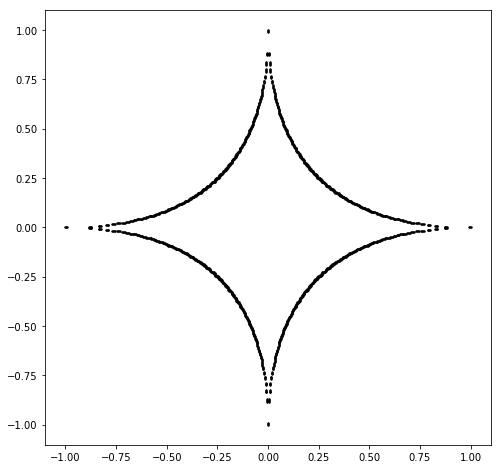

In [8]:
from scipy.linalg import norm


def plot_lp_norm(ax, p=2):
    """ this function helps warming up your home!
    """
    x = np.linspace(-1, 1, 501)
    y = np.linspace(-1, 1, 501)
    points_x = []
    points_y = []
    for _x in x:
        for _y in y:
            vec = np.array([_x, _y])
            v = norm(vec, p)
            if v < 1.01 and v > 0.99:
                points_x.append(_x)
                points_y.append(_y)
    ax.scatter(points_x, points_y, color='black', s=2)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
plot_lp_norm(ax, 1/2)

### 1.5

/Users/vyas/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]
/Users/vyas/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


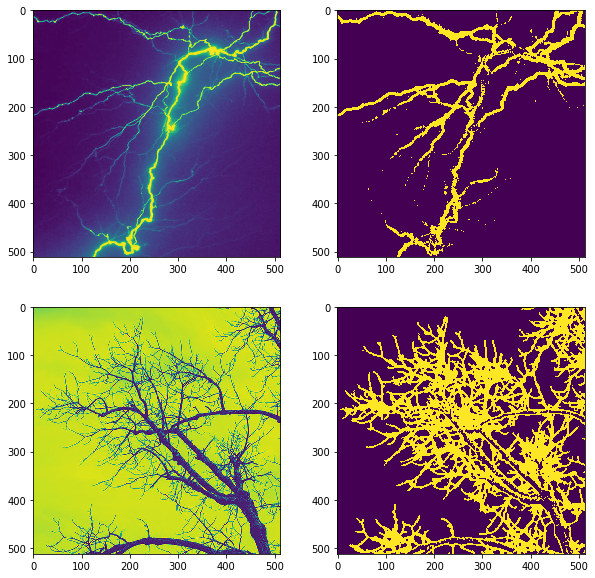

In [9]:
import numpy as np
import scipy.misc as msc
import scipy.ndimage as img

def foreground2Binimg(f):
    d = img.filters.gaussian_filter(f, sigma=0.5, mode='reflect') - \
        img.filters.gaussian_filter(f, sigma=1, mode='reflect')
    d = np.abs(d)
    m = d.max()
    d[d< 0.1 * m] = 0
    d[d>=0.1 * m] = 1
    return img.morphology.binary_closing(d)

f_l = msc.imread('lightning-3.png', flatten=True).astype('float32')
g_l = foreground2Binimg(f_l)
f_t = msc.imread('tree-2.png', flatten=True).astype('float32')
g_t = foreground2Binimg(f_t)

fig = plt.figure(figsize=(10,10))
fig.add_subplot(221).imshow(f_l)
fig.add_subplot(222).imshow(g_l)
fig.add_subplot(223).imshow(f_t)
fig.add_subplot(224).imshow(g_t)
plt.show()

N_lightning:	 [   4   14   45  147  404 1064]
N_tree:		 [   4   16   61  218  777 2679]
Fractal D: (lightning):	 1.61533717452
Fractal D: (tree):	 1.87371867662


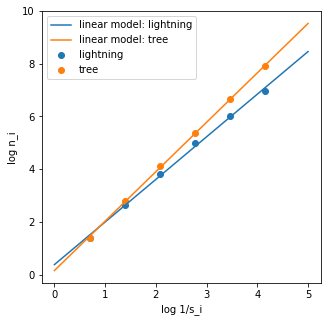

In [10]:
from scipy.stats import linregress

L = 9
S = np.array([1/2**i for i in range(1, L-2)])

def count_boxes(g, s_i):
    h,w = g.shape
    assert(h == w)
    sub_w = int(w * s_i)
    times_w = int(w/sub_w)
    
    n = 0
    for _x in range(0, times_w):
        for _y in range(0, times_w):
            x = _x * sub_w
            y = _y * sub_w
            I = g[y:y+sub_w,x:x+sub_w]
            count = np.sum(I)
            if count > 0:
                n += 1
    return n

N_l = np.array([count_boxes(g_l, s_i) for s_i in S])
N_t = np.array([count_boxes(g_t, s_i) for s_i in S])
print("N_lightning:\t", N_l)
print("N_tree:\t\t", N_t)

def get_fractal_dim(N, S):
    log_1ovS = np.log(1/S)
    log_N = np.log(N)
    
    R = linregress(x=log_1ovS, y=log_N)
    D = R.slope
    b = R.intercept
    return D, b
    
D_l, b_l = get_fractal_dim(N_l, S)
D_t, b_t = get_fractal_dim(N_t, S)

fractal_dim_lightning, fractal_dim_tree = D_l, D_t


print("Fractal D: (lightning):\t", fractal_dim_lightning)
print("Fractal D: (tree):\t", fractal_dim_tree)
    
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel('log 1/s_i')
ax.set_ylabel('log n_i')
ax.scatter(np.log(1/S), np.log(N_l), label='lightning')
ax.scatter(np.log(1/S), np.log(N_t), label='tree')

ax.plot([0, 5], [D_l * 0 + b_l, D_l * 5 + b_l], 
        label='linear model: lightning')
ax.plot([0, 5], [D_t * 0 + b_t, D_t * 5 + b_t], 
        label='linear model: tree')

plt.legend()
plt.show()